# Roller Coaster

#### Overview

This project is slightly different than others you have encountered thus far. Instead of a step-by-step tutorial, this project contains a series of open-ended requirements which describe the project you'll be building. There are many possible ways to correctly fulfill these requirements, and you should expect to use the internet, Codecademy, and other resources when you encounter a problem that you cannot easily solve.

#### Project Goals

You will work to create several data visualizations that will give you insight into the world of roller coasters.

## Prerequisites

In order to complete this project, you should have completed the first two lessons in the [Data Analysis with Pandas Course](https://www.codecademy.com/learn/data-processing-pandas) and the first two lessons in the [Data Visualization in Python course](https://www.codecademy.com/learn/data-visualization-python). This content is also covered in the [Data Scientist Career Path](https://www.codecademy.com/learn/paths/data-science/).

## Project Requirements

1. Roller coasters are thrilling amusement park rides designed to make you squeal and scream! They take you up high, drop you to the ground quickly, and sometimes even spin you upside down before returning to a stop. Today you will be taking control back from the roller coasters and visualizing data covering international roller coaster rankings and roller coaster statistics.

   Roller coasters are often split into two main categories based on their construction material: **wood** or **steel**. Rankings for the best wood and steel roller coasters from the 2013 to 2018 [Golden Ticket Awards](http://goldenticketawards.com) are provded in `'Golden_Ticket_Award_Winners_Wood.csv'` and `'Golden_Ticket_Award_Winners_Steel.csv'`, respectively. Load each csv into a DataFrame and inspect it to gain familiarity with the data.

In [13]:
# 1 
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# load rankings data
steel_rankings = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')
print(steel_rankings.head())

print()
# load rankings data
wood_rankings = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
print(wood_rankings.head())

   Rank                Name                        Park           Location  \
0     1    Millennium Force                 Cedar Point     Sandusky, Ohio   
1     2             Bizarro       Six Flags New England      Agawam, Mass.   
2     3  Expedition GeForce                Holiday Park  Hassloch, Germany   
3     4               Nitro   Six Flags Great Adventure      Jackson, N.J.   
4     5    Apollo’s Chariot  Busch Gardens Williamsburg  Williamsburg, Va.   

  Supplier  Year Built  Points  Year of Rank  
0  Intamin        2000    1204          2013  
1  Intamin        2000    1011          2013  
2  Intamin        2001     598          2013  
3      B&M        2001     596          2013  
4      B&M        1999     542          2013  

   Rank          Name                       Park             Location  \
0     1  Boulder Dash             Lake Compounce       Bristol, Conn.   
1     2       El Toro  Six Flags Great Adventure        Jackson, N.J.   
2     3       Phoenix  Knoebe

2. Write a function that will plot the ranking of a given roller coaster over time as a line. Your function should take a roller coaster's name and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with `"El Toro"` as the roller coaster name and the wood ranking DataFrame. What issue do you notice? Update your function with an additional argument to alleviate the problem, and retest your function.

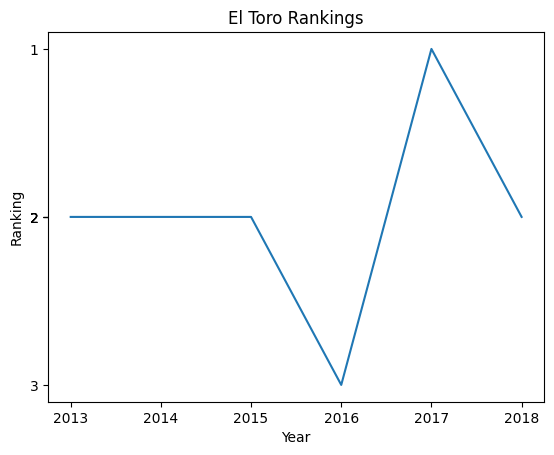

<Figure size 640x480 with 0 Axes>

In [14]:
# 2
# Create a function to plot rankings over time for 1 roller coaster
def plot_coaster_rankings(data, name, wood):
    coaster_rankings = data[(data.Name == name) & (data.Park == wood)]
    fig, ax = plt.subplots()
    ax.plot(coaster_rankings['Year of Rank'],coaster_rankings['Rank'])
    ax.set_xticks(coaster_rankings['Year of Rank'].values)
    ax.set_yticks(coaster_rankings['Rank'].values)
    ax.invert_yaxis()
    plt.title("{} Rankings".format(name))
    plt.xlabel('Year')
    plt.ylabel('Ranking')
    plt.show()
    plt.close()
# Create a plot of El Toro ranking over time
plot_coaster_rankings(wood_rankings, 'El Toro', 'Six Flags Great Adventure')
plt.clf()

3. Write a function that will plot the ranking of two given roller coasters over time as lines. Your function should take both roller coasters' names and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with `"El Toro"` as one roller coaster name, `"Boulder Dash"` as the other roller coaster name, and the wood ranking DataFrame. What issue do you notice? Update your function with two additional arguments to alleviate the problem, and retest your function.

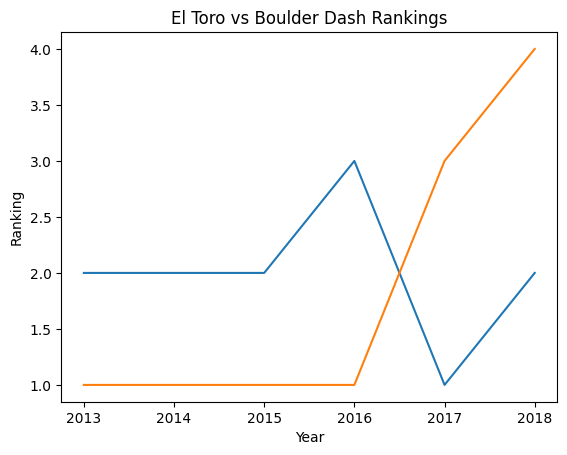

<Figure size 640x480 with 0 Axes>

In [15]:
# 3
# Create a function to plot rankings over time for 2 roller coasters
def plot_2_coaster_rankings(data, name1, wood1, name2, wood2):
    coaster_1_rankings = data[(data.Name == name1) & (data.Park == wood1)]
    coaster_2_rankings = data[(data.Name == name2) & (data.Park == wood2)]
    fig, ax = plt.subplots()
    ax.plot(coaster_1_rankings['Year of Rank'],coaster_1_rankings['Rank'])
    ax.plot(coaster_2_rankings['Year of Rank'],coaster_2_rankings['Rank'])
    # ax.invert_yaxis()
    plt.title("{} vs {} Rankings".format(name1,name2))
    plt.xlabel('Year')
    plt.ylabel('Ranking')
    plt.show()
    plt.close()
# Create a plot of El Toro ranking over time
plot_2_coaster_rankings(wood_rankings, 'El Toro', 'Six Flags Great Adventure', 'Boulder Dash', 'Lake Compounce')
plt.clf()

4. Write a function that will plot the ranking of the top `n` ranked roller coasters over time as lines. Your function should take a number `n` and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   For example, if `n == 5`, your function should plot a line for each roller coaster that has a rank of `5` or lower.
   
   Call your function with a value of `n` and either the wood ranking or steel ranking DataFrame.

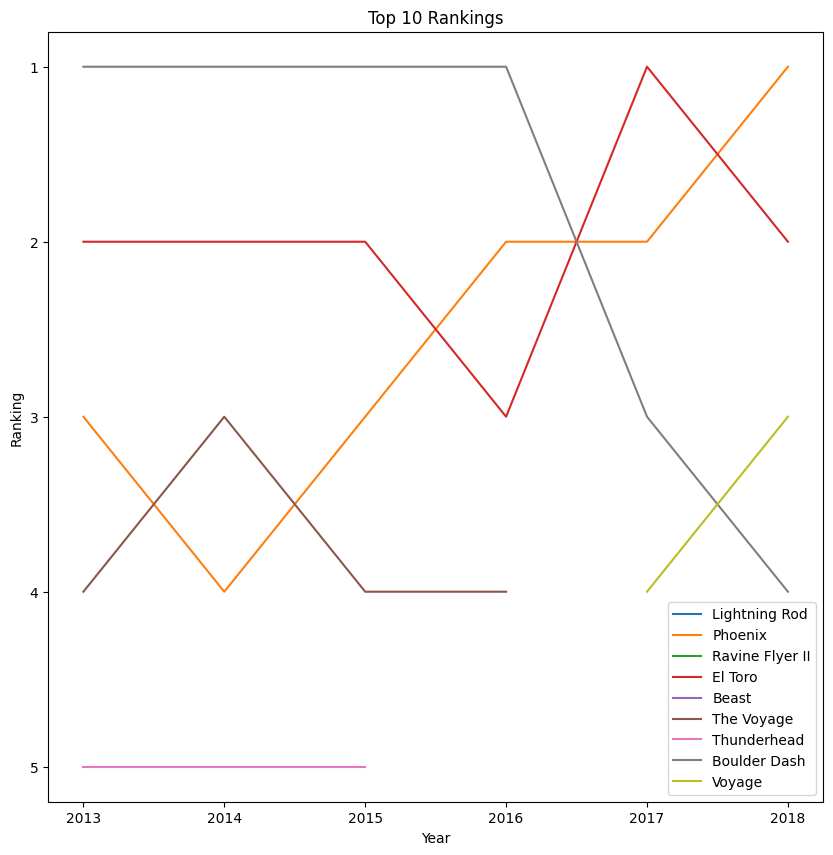

<Figure size 640x480 with 0 Axes>

In [25]:
# 4
# Create a function to plot top n rankings over time
# print(steel_rankings.Rank.unique)

def plot_top_n(data, n):
    top_n_ranking = data[data.Rank <= n]
    fig, ax = plt.subplots(figsize=(10,10))
    for coaster in set(top_n_ranking.Name):
        coaster_rankings = top_n_ranking[top_n_ranking.Name == coaster]
        ax.plot(coaster_rankings['Year of Rank'],coaster_rankings['Rank'],label=coaster)
    ax.set_yticks([i for i in range(1,6)])
    ax.invert_yaxis()
    plt.title("Top 10 Rankings")
    plt.xlabel('Year')
    plt.ylabel('Ranking')
    plt.legend(loc=4)
    plt.show()
    plt.close()
# Create a plot of top n rankings over time
plot_top_n(wood_rankings, 5)
plt.clf()

5. Now that you've visualized rankings over time, let's dive into the actual statistics of roller coasters themselves. [Captain Coaster](https://captaincoaster.com/en/) is a popular site for recording roller coaster information. Data on all roller coasters documented on Captain Coaster has been accessed through its API and stored in `roller_coasters.csv`. Load the data from the csv into a DataFrame and inspect it to gain familiarity with the data.

In [26]:
# 5
# load roller coaster data

roller_coasters = pd.read_csv('roller_coasters.csv')
print(roller_coasters.head())

            name material_type seating_type  speed  height  length  \
0       Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1  Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2     Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3       Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
4         Azteka         Steel     Sit Down   55.0    17.0   500.0   

   num_inversions     manufacturer            park            status  
0             7.0           Vekoma    Parc Asterix  status.operating  
1             0.0           Vekoma   Bobbejaanland  status.operating  
2             0.0         Zamperla    Terra Mítica  status.operating  
3             0.0  William J. Cobb  Walygator Parc  status.operating  
4             0.0           Soquet          Le Pal  status.operating  


6. Write a function that plots a histogram of any numeric column of the roller coaster DataFrame. Your function should take a DataFrame and a column name for which a histogram should be constructed as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame and one of the column names.

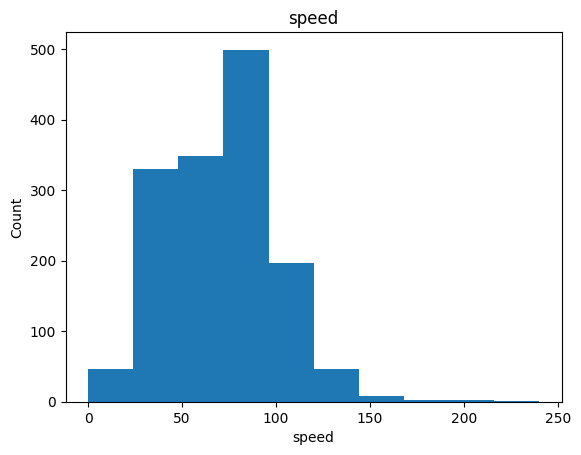

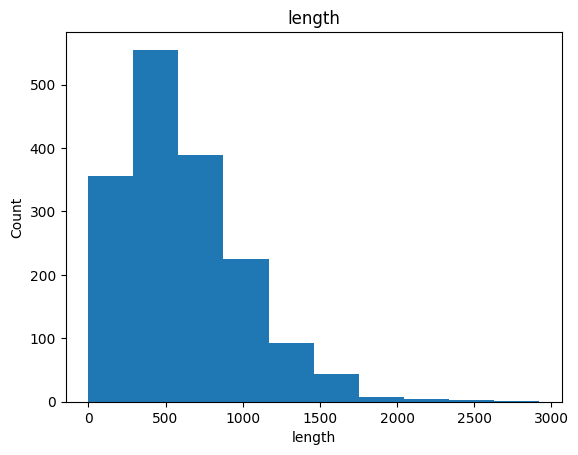

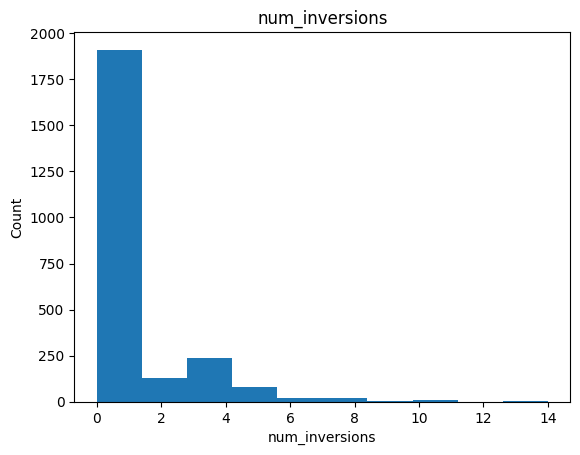

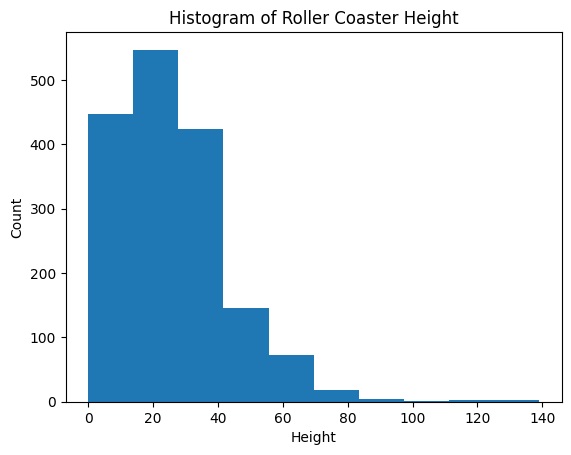

In [30]:
# 6
# Create a function to plot histogram of column values
def plot_hist(data, column):
    plt.hist(data[column].dropna())
    plt.title('{}'.format(column))
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()
    plt.close()
    plt.clf()
# Create histogram of roller coaster speed
plot_hist(roller_coasters, 'speed')
plt.clf()
plt.close()
# Create histogram of roller coaster length
plot_hist(roller_coasters, 'length')
plt.clf()
plt.close()
# Create histogram of roller coaster number of inversions
plot_hist(roller_coasters, 'num_inversions')
plt.clf()
plt.close()
# Create a function to plot histogram of height values
def plot_hist_height(data):
    plt.hist(data[data.height <= 140].height.dropna())
    plt.title('Histogram of Roller Coaster Height')
    plt.xlabel('Height')
    plt.ylabel('Count')
    plt.show()
    plt.close()
    
# Create a histogram of roller coaster height
plot_hist_height(roller_coasters)

7. Write a function that creates a bar chart showing the number of inversions for each roller coaster at an amusement park. Your function should take the roller coaster DataFrame and an amusement park name as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame and amusement park name.

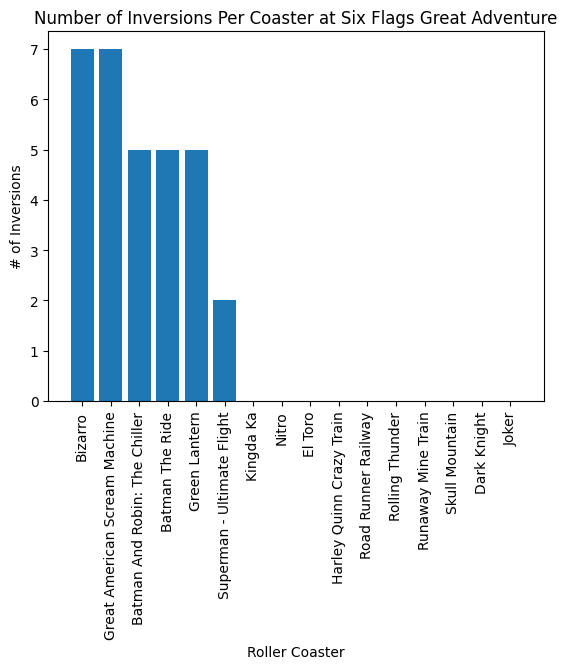

<Figure size 640x480 with 0 Axes>

In [32]:
# 7
# Create a function to plot inversions by coaster at park
def plot_bar_inversion(data, park):
    park_coasters = data[data['park'] == park].sort_values('num_inversions', ascending=False)
    coaster_names = park_coasters['name']
    number_inversions = park_coasters['num_inversions']
    plt.bar(range(len(number_inversions)),number_inversions)
    ax = plt.subplot()
    ax.set_xticks(range(len(coaster_names)))
    ax.set_xticklabels(coaster_names,rotation=90)
    plt.title('Number of Inversions Per Coaster at {}'.format(park))
    plt.xlabel('Roller Coaster')
    plt.ylabel('# of Inversions')
    plt.show()
    plt.close()
# Create barplot of inversions by roller coasters

plot_bar_inversion(roller_coasters, 'Six Flags Great Adventure')
plt.clf()

8. Write a function that creates a pie chart that compares the number of operating roller coasters (`'status.operating'`) to the number of closed roller coasters (`'status.closed.definitely'`). Your function should take the roller coaster DataFrame as an argument. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame.

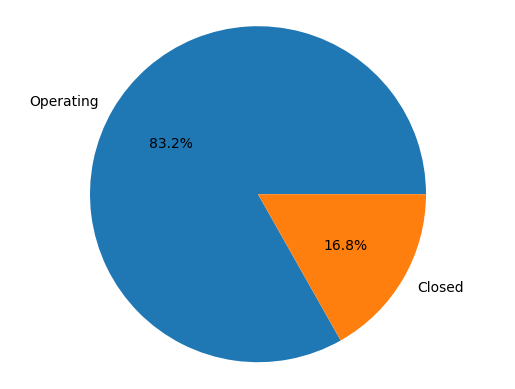

<Figure size 640x480 with 0 Axes>

In [38]:
# 8
# Create a function to plot a pie chart of status.operating
def plot_pie_status(data):
    status_operating = len(data[data.status == 'status.operating'])
    status_closed = len(data[data.status == 'status.closed.definitely'])
    combine_status = [status_operating, status_closed]
    plt.pie(combine_status, labels=['Operating', 'Closed'], autopct='%0.1f%%')
    plt.axis('equal')
    plt.show()
    plt.clf()
# Create pie chart of roller coasters
plot_pie_status(roller_coasters)



9. `.scatter()` is another useful function in matplotlib that you might not have seen before. `.scatter()` produces a scatter plot, which is similar to `.plot()` in that it plots points on a figure. `.scatter()`, however, does not connect the points with a line. This allows you to analyze the relationship between two variables. Find [`.scatter()`'s documentation here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

   Write a function that creates a scatter plot of two numeric columns of the roller coaster DataFrame. Your function should take the roller coaster DataFrame and two-column names as arguments. Make sure to include informative labels that describe your visualization.
   
   Call your function with the roller coaster DataFrame and two-column names.

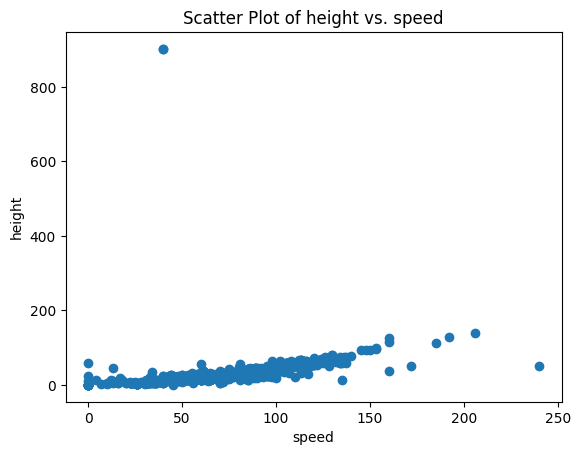

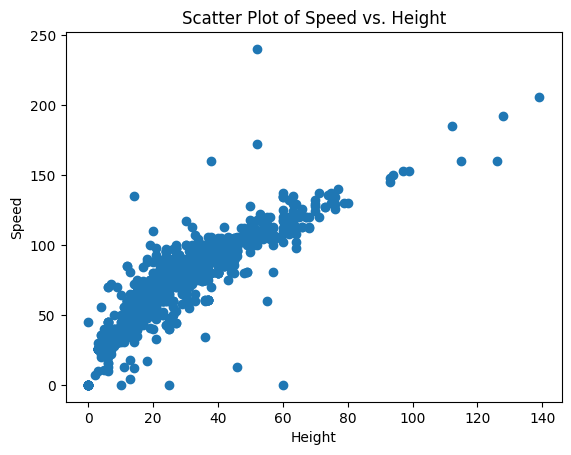

<function matplotlib.pyplot.clf()>

In [42]:
# 9
# Create a function to plot scatter of any two columns
def plot_scatter(data, column1, column2):
    plt.scatter(data[column1], data[column2])
    plt.title('Scatter Plot of {} vs. {}'.format(column2,column1))
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.show()
    plt.close()
    
plot_scatter(roller_coasters, 'speed', 'height')

# Create a function to plot scatter of speed vs height
def plot_scatter_height_speed(coaster_df):
  coaster_df = coaster_df[coaster_df['height'] < 140]
  plt.scatter(coaster_df['height'],coaster_df['speed'])
  plt.title('Scatter Plot of Speed vs. Height')
  plt.xlabel('Height')
  plt.ylabel('Speed')
  plt.show()
  plt.close()

# Create a scatter plot of roller coaster height by speed
plot_scatter_height_speed(roller_coasters)
plt.clf
